<h1>INF1036 - Probabilidade Computacional</h1>

<h2>Alunos: João Pedro Guimarães Soares e Mark Ribeiro<br>Matrículas: 1721122 e 1612043</h2>

<h3>Imports:</h3>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats

%matplotlib inline

In [10]:
def rExponencial(nsamples,rate):
    x = np.zeros(nsamples)
    u = np.random.sample(nsamples)
    for i in range(nsamples):
        x[i] = - math.log(u[i])/rate
    return x

def rate(t):
    if (t < 1.0):
        return 10.0
    elif (t < 2.0):
        return 5.0
    elif (t < 3.0):
        return 10.0
    elif (t < 4.0):
        return 2.0
    elif (t < 5.0):
        return 5.0
    else:
        return 10.0
        
def rNextArrival(t,rate,ratemax):
    while (1):
        Z = rExponencial(1,ratemax)[0]
        t = t + Z
        U = np.random.sample(1)
        if (U < rate(t)/ratemax):
            return t

def rParallelQueue(rate,ratemax,rateD1,rateD2,T):
    t  = 0.0
    ta = rNextArrival (t,rate,ratemax)
    td1 = 1.0e+30
    td2 = 1.0e+30
    TA = []
    TD1 = []
    TD2 = []
    n  = 0
    while(1):
        if ((ta<=min(td1,td2))and(ta<T)):
            t = ta
            TA.append(t)
            n = n+1
            if (n == 1):
                td1 = t + rExponencial(1,rateD1)[0]
            elif (n == 2):
                if (td1 == 1.0e+30):
                    td1 = t + rExponencial(1,rateD1)[0]
                else:
                    td2 = t + rExponencial(1,rateD2)[0]
            ta = rNextArrival (t,rate,ratemax)
        elif ((td1<ta)and(td1<=td2)and(td1<T)):
            t = td1
            TD1.append(t)
            n = n-1
            if (n == 0):
                td1 = 1.0e+30
            elif ((n==1)and(td2<1.0e+30)):
                td1 = 1.0e+30
            else:
                td1 = t + rExponencial(1,rateD1)[0]
        elif ((td2<ta)and(td2<=td1)and(td2<T)):
            t = td2
            TD2.append(t)
            n = n-1
            if (n == 0):
                td2 = 1.0e+30
            elif ((n==1)and(td1<1.0e+30)):
                td2 = 1.0e+30
            else:
                td2 = t + rExponencial(1,rateD2)[0]
        elif ((min(ta,min(td1,td2))>T)and(n>0)):
            while(n>0):
                if (td1 < td2):
                    t = td1
                    TD1.append(td1)
                    n = n-1
                    if (n > 1):
                        td1 = t + rExponencial(1,rateD1)[0]
                    elif ((n==1)and(td2<1.0e+30)):
                        td1 = 1.0e+30
                else:
                    t = td2
                    TD2.append(td2)
                    n = n-1
                    if (n > 1):
                        td2 = t + rExponencial(1,rateD2)[0]
                    elif ((n==1)and(td1<1.0e+30)):
                        td2 = 1.0e+30

        else:
            return (max(t-T,0.0)),TA,TD1,TD2

t,TA,TD1,TD2 = rParallelQueue(rate,10.0,1.0,15.0,6.0)
print(t*60.0)
print(TA,len(TA))
print(TD1,len(TD1))
print(TD2,len(TD2))

27.59463801982184
[0.011849391515693223, 0.12346417814628166, 0.33067239662788084, 0.4739080017688364, 0.7575115672451007, 0.8485549815256592, 1.074520771689855, 1.4725749570653752, 1.4830250949912627, 2.167727029886196, 2.234076926488545, 2.246721144902519, 2.30090561351749, 2.369215831872785, 2.6014592791643385, 2.63635143182488, 2.6815758597360135, 2.912598033245633, 2.956032767872469, 3.304827620595798, 3.437533615719188, 3.454164387145858, 4.146287092162317, 4.215467822694937, 4.445677780201695, 4.453255659396746, 4.537389016705637, 4.624369927540748, 4.643316589915809, 4.683363998468259, 4.904880686411612, 4.947320936240569, 5.001743637563799, 5.031281450924643, 5.079880745628696, 5.086227811555712, 5.151014969655436, 5.16846211399046, 5.251481180018394, 5.283926306358477, 5.3046728916313075, 5.406175709583587, 5.415616401102744, 5.427452069553989, 5.542225000648772, 5.824273638658002, 5.997439210295318] 47
[0.8570495037329904, 1.3879785354274203, 1.529448672262017, 3.67147746797

9.663641552767386
120.47210155033473
7405
0.249993549450364
Com 95.0% de confiança, a média está aproximadamente no intervalo [9.413648003317022,9.91363510221775]


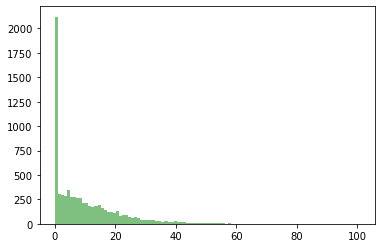

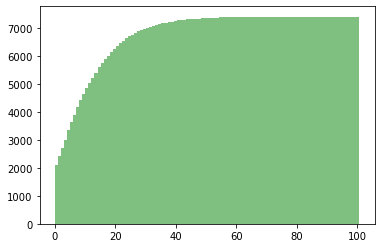

In [13]:
def rSeQ(tol,alpha,rate,ratemax,rateD1,rateD2,T):
    x = []
    for i in range(100):
        t,TA1,TD1,TD2 = rParallelQueue(rate,ratemax,rateD1,rateD2,T)
        x.append(t*60.0)
    n = 100
    mx = np.mean(x)
    s2x = np.var(x)
    zalphaby2 = scipy.stats.norm.ppf(1.0-alpha/2.0)
    while(2.0*zalphaby2*math.sqrt(s2x/float(n))>=tol):
        t,TA1,TD1,TD2 = rParallelQueue(rate,ratemax,rateD1,rateD2,T)
        nx = t*60.0
        x.append(nx)
        nmx = mx + (nx-mx)/float(float(n)+1)
        ns2x = (1.-1./float(n))*s2x+(float(n)+1.)*((nmx-mx)**2)
        n = n+1
        mx = nmx
        s2x = ns2x
        #print(s2x/n)
    return x,mx,s2x,n

alpha = 0.05
tol = 0.5
x,mx,s2x,n = rSeQ(tol,alpha,rate,10.0,8.0,8.0,6.0)
print(mx)
print(s2x)
print(n)

print(scipy.stats.norm.ppf(1.0-alpha/2.0)*math.sqrt(s2x/n))

print('Com '+str(100*(1.0-alpha))+'% de confiança, a média está aproximadamente no intervalo ['+str(mx-scipy.stats.norm.ppf(1.0-alpha/2.0)*math.sqrt(s2x/float(n)))+','+str(mx+scipy.stats.norm.ppf(1.0-alpha/2.0)*math.sqrt(s2x/float(n)))+']')


plt.hist(x,100,facecolor='green', alpha=0.5)
plt.show()
plt.hist(x,100,cumulative=True,facecolor='green', alpha=0.5)
plt.show()